In [1]:
import numpy as np
import itertools
import random
from time import time

In [2]:
a = [1,2,3,4] # могут быть не сортированными , макс а+b и по скорости(точно) и по памяти?
b = [2,3,4,5]
_sum = 7
def func_1(a:list,b:list,_sum:int) ->bool:
    """
    написать функцию которая выдает True/False когда сумма a[x]+b[x] == _sum
    порассуждать по скорости и памяти
    """
    #baseline
    for i in a:
        for j in b:
            if i+j==_sum:
                return True
    return False

In [3]:
func_1(a,b,_sum)

True

In [4]:
n, m, sum_long = np.arange(1,123456), np.arange(1,123456), 5432
random.Random(0).shuffle(n)
random.Random(1).shuffle(m)

before = time()
print(func_1(n, m, sum_long))
after = time()
print(after - before)

True
0.4300246238708496


In [5]:
# более "крутой" код, жрет 9000 памяти
def func_2(a:list,b:list,_sum:int) ->bool:
    return _sum in [sum(x) for x in list(itertools.product(a, b))]

In [6]:
func_2(a,b,_sum)

True

In [7]:
# before = time()
# print(func_2(n, m, sum_long))
# after = time()
# print(after - before)

In [8]:
def func_3(a:list,b:list,_sum:int) ->bool:
    a, b = np.array(a)-_sum, -np.array(b) # вычтем поэлементно из а значение target, b = -b
    for i in a:
        for j in b:
            if i==j:
                return True
    return False

In [9]:
func_3(a,b,_sum)

True

In [10]:
before = time()
print(func_3(n, m, sum_long))
after = time()
print(after - before)

True
0.1390078067779541


In [11]:
n, m, sum_long = np.arange(1,123456), np.arange(1,123456), 5432
random.Random(0).shuffle(n)
random.Random(1).shuffle(m)

def bin_search(tmp_list:list, tmp_int:int) ->bool:
    left, right, middle = tmp_list[0], tmp_list[-1], tmp_list[len(tmp_list)//2]
    if tmp_int == middle:
        return True
    elif len(tmp_list) == 1:
        return False
    elif tmp_int < middle:
        return bin_search(tmp_list[0:len(tmp_list)//2], tmp_int)
    else:
        return bin_search(tmp_list[len(tmp_list)//2:len(tmp_list)], tmp_int)

def rec_search(a:list,b:list,_sum:int) ->bool:
    #a, b = sorted(a), sorted(b)
    i = _sum
    while i != 0:
        if bin_search(a,i) and bin_search(b,_sum-i):
            return True
        i-=1
    return False    

In [12]:
print(bin_search(np.arange(1,123456), 5432))
print(bin_search(np.arange(1,123456,2), 5432))
print(bin_search(sorted(n), sum_long))
print(bin_search(sorted(m), sum_long))

True
False
True
True


In [13]:
rec_search(sorted(a),sorted(b),_sum)

True

In [14]:
n, m, sum_long = np.arange(1,123456), np.arange(1,123456), 5432
random.Random(0).shuffle(n)
random.Random(1).shuffle(m)

before = time()
print(rec_search(sorted(n), sorted(m), sum_long))
after = time()
print(after - before)

True
0.13300728797912598


In [15]:
n, m, sum_long = np.arange(1,123456), np.arange(1,123456), 5432
random.Random(0).shuffle(n)
random.Random(1).shuffle(m)

before = time()
n.sort()
m.sort()
print(rec_search(n, m, sum_long))
after = time()
print(after - before)

True
0.014000892639160156


In [16]:
def rec_search_2(a:list,b:list,_sum:int) ->bool:
    a, b = np.array(a), np.array(b)
    a, b = a[a < _sum-b[0]], b[b < _sum-a[0]] # нет смысла оставлять эелементы, сумма которых с min другого списка > _sum
    i = _sum
    while i != 0:
        if bin_search(a,i) and bin_search(b,_sum-i):
            return True
        i-=1
    return False  

In [17]:
n, m, sum_long = np.arange(1,123456), np.arange(1,123456), 5432
random.Random(0).shuffle(n)
random.Random(1).shuffle(m)

before = time()
n.sort()
m.sort()
print(rec_search_2(n, m, sum_long))
after = time()
print(after - before)

True
0.014000654220581055


In [18]:
def hash_search(a:list,b:list,_sum:int) ->bool:
    dict_a = {}
    for item in a:
        dict_a[item] = True
    for item in b:
        if _sum-item in dict_a:
            return True
    return False    

In [19]:
n, m, sum_long = np.arange(1,123456), np.arange(1,123456), 5432
random.Random(0).shuffle(n)
random.Random(1).shuffle(m)

before = time()
print(hash_search(n, m, sum_long))
after = time()
print(after - before)

True
0.021001100540161133


In [26]:
bin_search(np.arange(1,123456), 200-100)

True

In [27]:
def search_I(a, b, _sum):
    b.sort()
    for x in a:
        if bin_search(b, _sum - x):
            return True
    return False

In [28]:
n, m, sum_long = np.arange(1,123456), np.arange(1,123456), 5432
random.Random(0).shuffle(n)
random.Random(1).shuffle(m)

before = time()
print(search_I(n, m, sum_long))
after = time()
print(after - before)

True
0.00700068473815918


In [ ]:
"""
Baseline:                            0.428
substract _sum elementwise from a:   0.140 (3x faster)
rec_search with sorted(arr):         0.135 (3x faster)
hash_search:                         0.020 (20x faster)
rec_search with arr.sort():          0.013 (32x faster)
search_I                             0.007 (60x faster)
"""

In [58]:
#==============================================================================================

In [57]:
# Given an unsorted array of integers, find the length of the longest consecutive sequence.
a = [1,2,3,4,5,2,3,1,2,3,4,5,6]
i = 0
max_result = 0
while i < len(a):
    result = 1
    while i != len(a)-1 and a[i] < a[i+1]:
        result+=1
        i+=1
    if result > max_result:
        max_result = result 
    i+=1
max_result

6

In [30]:
#==============================================================================================

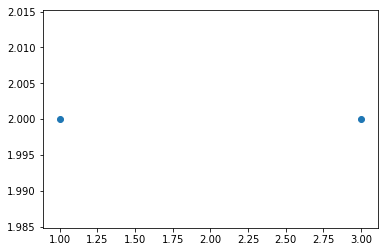

In [36]:
import matplotlib.pyplot as plt
a, b = [3,2], [1,2]
a, b = [a[0],b[0]], [a[1],b[1]]
plt.scatter(a,b)
plt.show()

In [37]:
def is_symmetric(a,b):
    if (a[1] == b[1]) and (a[0] != b[0]):
        return True
    return False

In [38]:
is_symmetric([3,2], [1,2])

True